In [2]:
import pandas as pd
from pandasql import sqldf
import os

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import numpy as np

pysqldf = lambda q: sqldf(q, globals())

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal', 
        'size'   : 18}

matplotlib.rc('font', **font)

# Data preprocessing
This notebook preprocess the PANSEC 3.0 dataset, collected by `collect_time.py`.

**Note**:
- `x264` and `ferret` fails to compile on crunchy, therefore I manually remove it.
- `swaptions` is not scalable at small scale input after 16 threads. I remove it.
- `facesim` and `fluidanimate` is only applicable if thread is to the power of 2. Its exec. time at other point is linaer inteploted. 

In [2]:
# load the data frame and drop first dummy index
df = pd.read_csv(os.path.join("data", "data_time.csv"))
df = df.drop(columns=['Unnamed: 0'])
df

,Name,Size,Thread,Time
0,blackscholes,simsmall,1,0.144
1,blackscholes,simmedium,1,0.555
2,blackscholes,simlarge,1,2.318
3,blackscholes,simsmall,2,0.085
4,blackscholes,simmedium,2,0.311
...,...,...,...,...
2695,vips,simmedium,28,0.748
2696,vips,simlarge,28,1.580
2697,vips,simsmall,32,0.444
2698,vips,simmedium,32,0.781


In [3]:
pd.options.display.max_rows = 999
df_stat = df.groupby(["Name", "Size", "Thread"]).describe()
df_stat

Time                                       \
                               count     mean       std     min       25%   
Name          Size      Thread                                              
blackscholes  simlarge  1       10.0   2.2368  0.038282   2.186   2.21100   
                        2       10.0   1.2723  0.034322   1.238   1.25700   
                        4       10.0   0.8103  0.036139   0.766   0.78725   
                        8       10.0   0.5766  0.024659   0.551   0.55650   
                        12      10.0   0.4955  0.016050   0.475   0.48200   
                        16      10.0   0.4846  0.010803   0.471   0.47675   
                        20      10.0   0.4561  0.013964   0.432   0.44475   
                        24      10.0   0.4410  0.012202   0.425   0.43325   
                        28      10.0   0.4400  0.023305   0.396   0.42925   
                        32      10.0   0.4293  0.017951   0.413   0.42025   
              simmedium 1       10.0   0.5684  0.022157   0.547   0.55950   
                        2       10.0   0.3291  0.013940   0.308   0.32125   
                        4       10.0   0.2138  0.012839   0.198   0.20575   
                        8       10.0   0.1565  0.009431   0.141   0.15125   
                        12      10.0   0.1390  0.006055   0.130   0.13375   
                        16      10.0   0.1307  0.004498   0.124   0.12825   
                        20      10.0   0.1296  0.008605   0.118   0.12325   
                        24      10.0   0.1210  0.005228   0.114   0.11800   
                        28      10.0   0.1156  0.004624   0.108   0.11400   
                        32      10.0   0.1176  0.003406   0.111   0.11525   
              simsmall  1       10.0   0.1539  0.020920   0.141   0.14400   
                        2       10.0   0.0969  0.019846   0.084   0.08725   
                        4       10.0   0.0636  0.008501   0.055   0.05700   
                        8       10.0   0.0464  0.008514   0.040   0.04225   
                        12      10.0   0.0412  0.003938   0.036   0.03725   
                        16      10.0   0.0414  0.003864   0.038   0.03900   
                        20      10.0   0.0404  0.003169   0.038   0.03800   
                        24      10.0   0.0396  0.003134   0.037   0.03800   
                        28      10.0   0.0414  0.004300   0.037   0.03825   
                        32      10.0   0.0379  0.003348   0.033   0.03700   
bodytrack     simlarge  1       10.0   5.1746  0.053380   5.080   5.14150   
                        2       10.0   2.8456  0.042657   2.767   2.82150   
                        4       10.0   1.6787  0.027166   1.640   1.66500   
                        8       10.0   1.1204  0.015465   1.095   1.11300   
                        12      10.0   1.0044  0.027826   0.968   0.98400   
                        16      10.0   0.9949  0.041581   0.906   0.97875   
                        20      10.0   0.9991  0.029808   0.953   0.97850   
                        24      10.0   0.9946  0.039906   0.910   0.97825   
                        28      10.0   0.9941  0.031684   0.935   0.97475   
                        32      10.0   0.9841  0.033581   0.941   0.95925   
              simmedium 1       10.0   1.5131  0.024131   1.477   1.49700   
                        2       10.0   0.8604  0.020844   0.832   0.84425   
                        4       10.0   0.5464  0.009536   0.531   0.54225   
                        8       10.0   0.4266  0.029466   0.388   0.41600   
                        12      10.0   0.3945  0.017180   0.375   0.38150   
                        16      10.0   0.3975  0.019609   0.364   0.38525   
                        20      10.0   0.4048  0.019298   0.382   0.38900   
                        24      10.0   0.4159  0.018853   0.396   0.40600   
                        28      10.0   0.4030  0.021406   0.359   0.39075   
                        32  

In [72]:
def interplotation(y_spl, ts):
    # interplotation
    y_spl = np.array(y_spl)
    ts = np.array(ts)
    
    y_spl_ = []
    ts_ = []
    i = 0
    for t in range(1, 33):
        if i + 1 < ts.shape[0] and ts[i + 1] + 1e-3 < t:
            i += 1
        if i + 1 == ts.shape[0]:
            y_spl_.append(y_spl[i])
            ts_.append(t)
        else:
            a = (t - ts[i]) / (ts[i + 1] - ts[i])
            y_spl_.append((1 - a) * y_spl[i] + a * y_spl[i + 1])
            ts_.append(t)


    y_spl = np.array(y_spl_)
    ts = np.array(ts_)
    
    return y_spl, ts

modules = [
    'blackscholes',
    'bodytrack',
    'canneal',
    'facesim',
    'fluidanimate',
    'freqmine',
    'streamcluster',
    'swaptions',
    'vips'
]

data = []


for m in modules:
    ts = []
    threads = []
    previous = None

    i += 1

    for r in df_stat['Time', 'mean'].iteritems():
        (name, size, thread), t = r
        if name == m:
            if m == "swaptions" and size == "simsmall":
                continue # the testcase is not scalable after thread = 16
            if ((name, size) == previous):
                # facesim and fluidanmate not support thread num other than the power of 2
                if m in ["facesim", "fluidanimate"]:
                    if thread in [1, 2, 4, 8, 16, 32]:
                        ts.append(t)
                        threads.append(thread)
                else:
                    ts.append(t)
                    threads.append(thread)
            else:
                if previous is not None:
                    spd_up = ts[0] / np.array(ts)
                    spd_up, _ = interplotation(spd_up, threads)
                    ts, threads = interplotation(ts, threads)
                    
                    for i in range(32):
                        data.append([previous[0], previous[1], threads[i], ts[i], spd_up[i]])
                    
                ts = [t]
                threads = [thread]
                previous = (name, size)

    spd_up = ts[0] / np.array(ts)
    spd_up, _ = interplotation(spd_up, threads)
    ts, threads = interplotation(ts, threads)
    
    for i in range(32):
        data.append([previous[0], previous[1], threads[i], ts[i], spd_up[i]])

df_preprocessed = pd.DataFrame(data=data, columns=["Name", "Size", "Thread", "Exec Time", "Speed Up"])
df_preprocessed.to_csv(os.path.join("data", "data_speedup.csv"), index=None)
pd.options.display.max_rows = 30
df_preprocessed

,Name,Size,Thread,Exec Time,Speed Up
0,blackscholes,simlarge,1,2.236800,1.000000
1,blackscholes,simlarge,2,1.272300,1.758076
2,blackscholes,simlarge,3,1.041300,2.259268
3,blackscholes,simlarge,4,0.810300,2.760459
4,blackscholes,simlarge,5,0.751875,3.040167
...,...,...,...,...,...
827,vips,simsmall,28,0.403600,3.308226
828,vips,simsmall,29,0.408500,3.269922
829,vips,simsmall,30,0.413400,3.231618
830,vips,simsmall,31,0.418300,3.193314


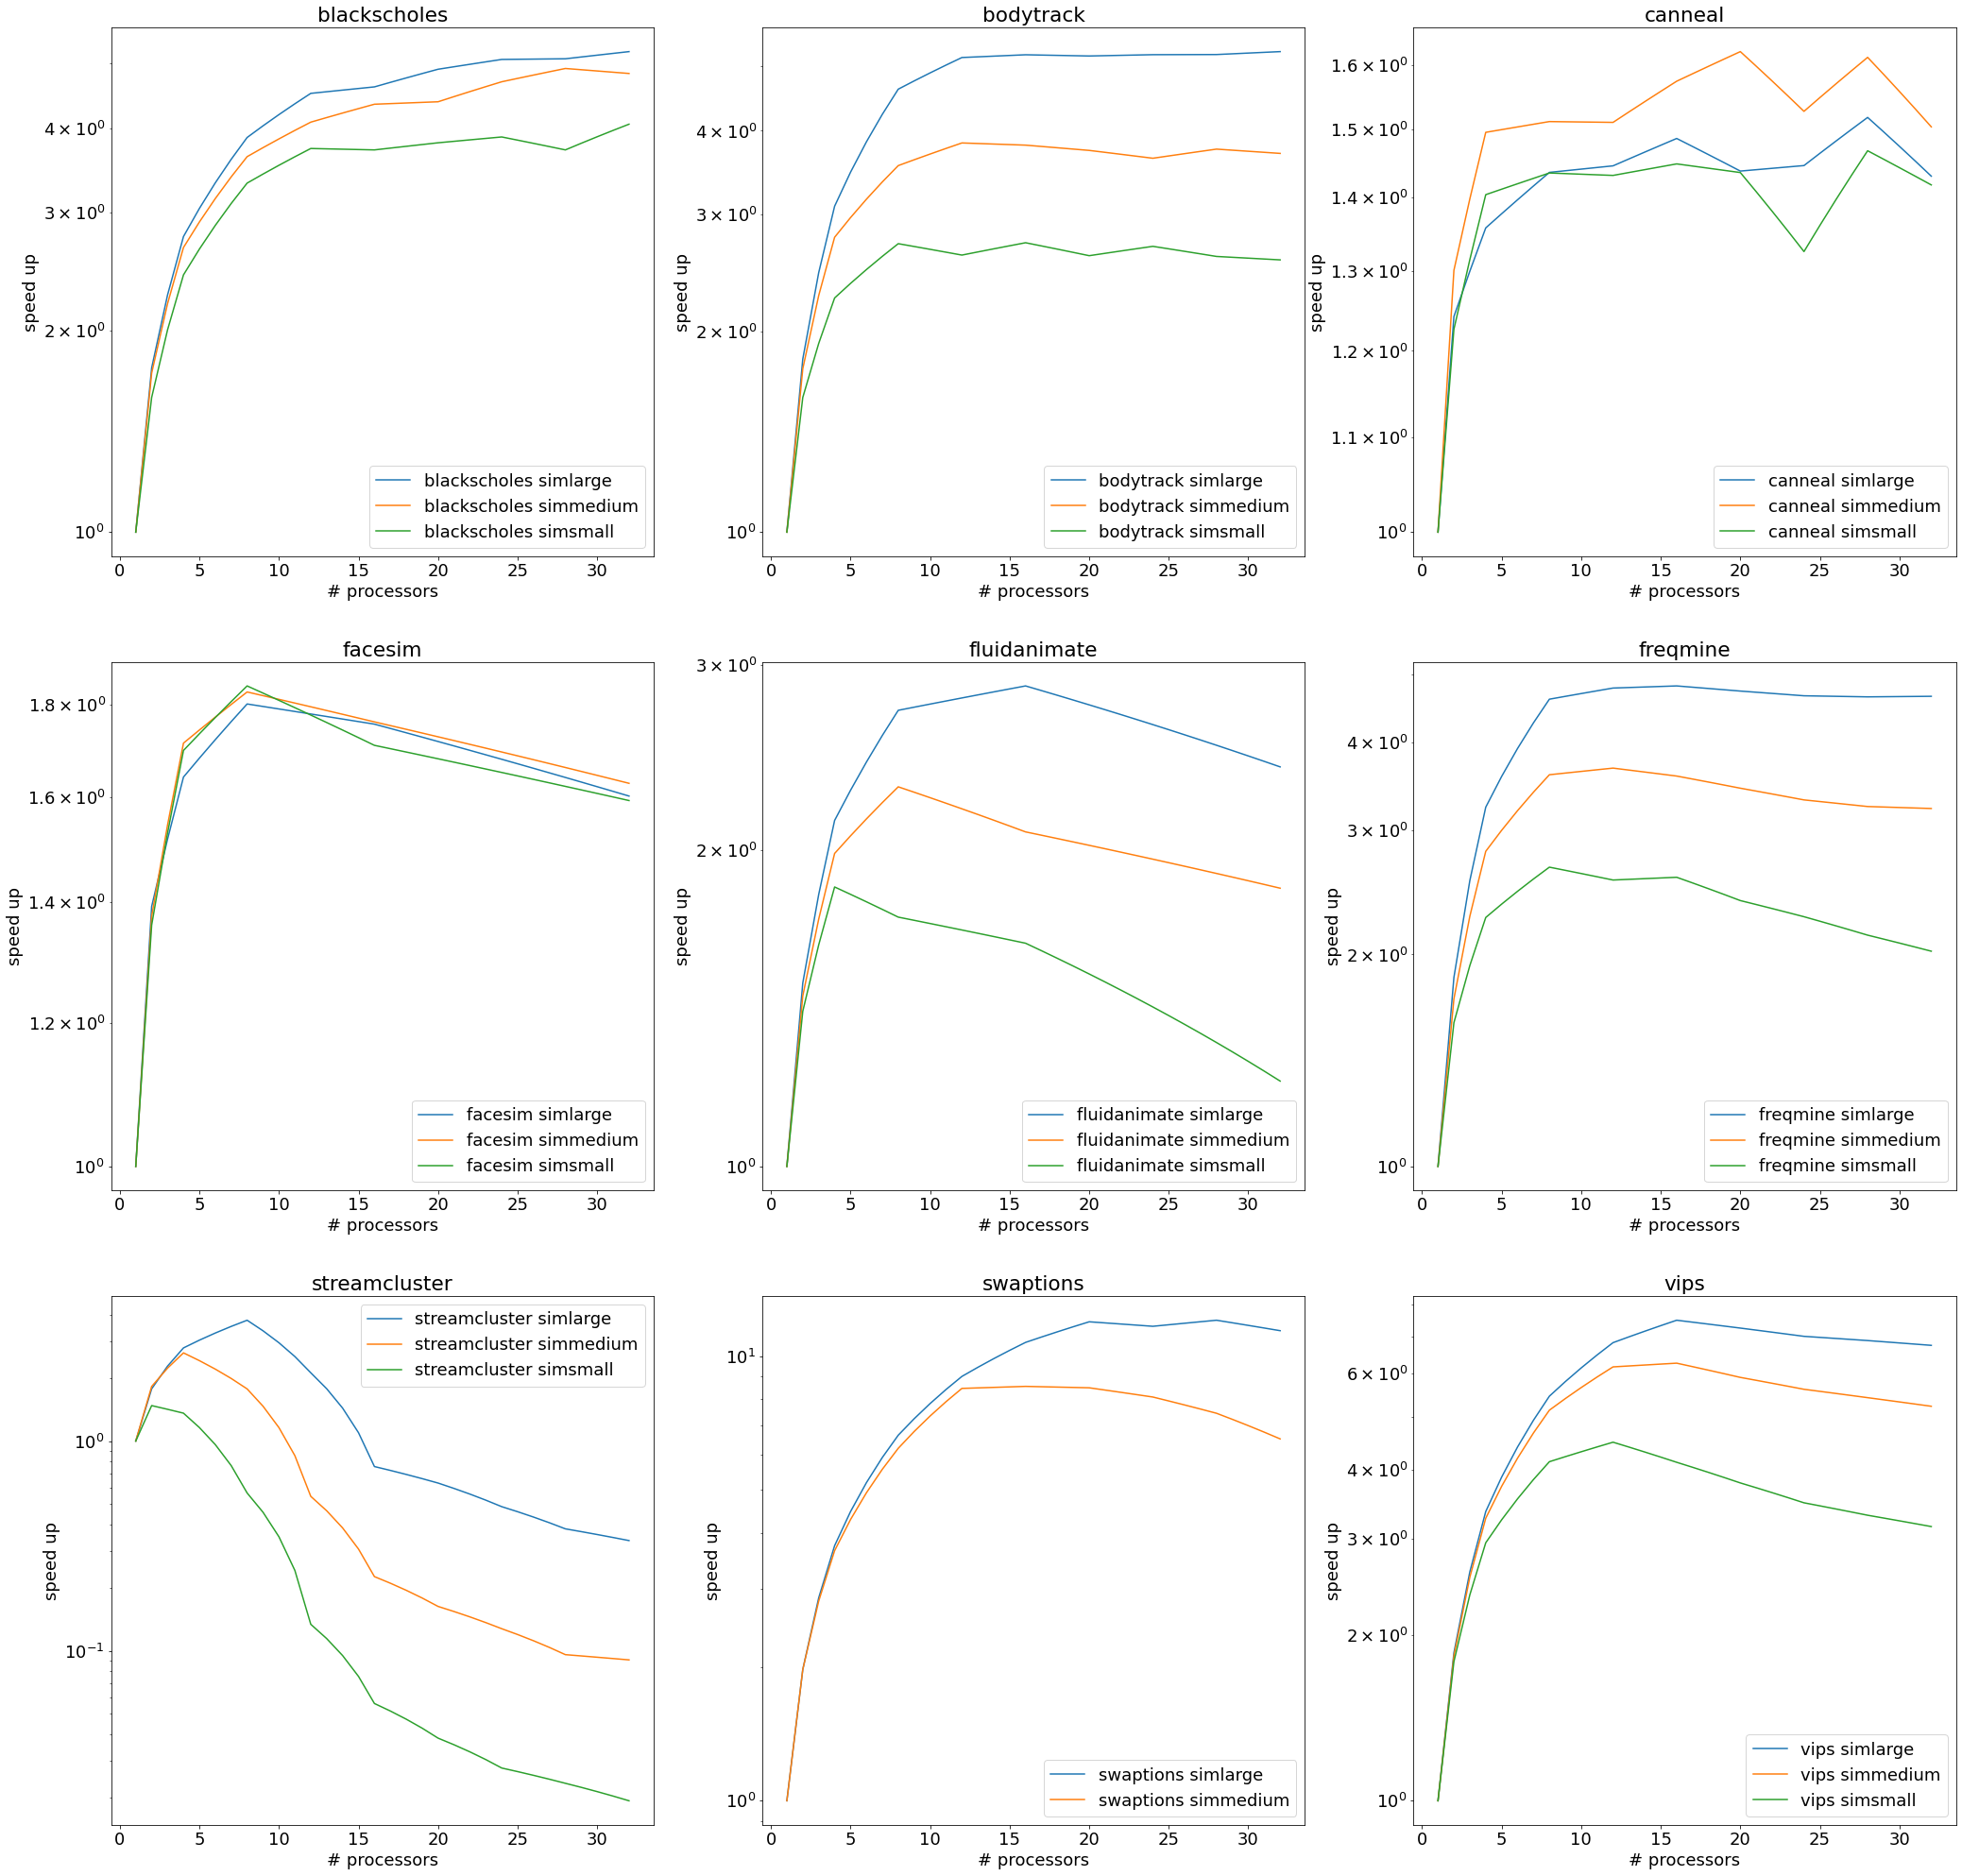

In [71]:
modules = [
    'blackscholes',
    'bodytrack',
    'canneal',
    'facesim',
    'fluidanimate',
    'freqmine',
    'streamcluster',
    'swaptions',
    'vips'
]

i = 0
plt.rcParams['figure.figsize'] = [35, 35]
previous = None

for m in modules:
    spd_ups = []
    threads = []
    previous = None

    i += 1
    ax = plt.subplot(330 + i)

    for r in df_preprocessed.iterrows():
        _, (name, size, thread, _, spd_up) = r
        
        if name == m:
            if (name, size) == previous:
                spd_ups.append(spd_up)
                threads.append(thread)
            else:
                if previous is not None:
                    ax.plot(threads, spd_ups, label=previous[0] + " " + previous[1])
                    ax.set_yscale("log")

                    plt.xlabel("# processors")
                    plt.ylabel("speed up")

                    plt.legend()
                    plt.title(m)
                previous = (name, size)
                spd_ups = [spd_up]
                threads = [thread]
        
    ax.plot(threads, spd_ups, label=previous[0] + " " + previous[1])
    ax.set_yscale("log")

    plt.xlabel("# processors")
    plt.ylabel("speed up")

    plt.legend()
    plt.title(m)
plt.show()

## Preprocess stat_single_thread.csv

In [10]:
# load the data
csv_path = os.path.join("data", "stat_single_thread.csv")
df = pd.read_csv(csv_path)
df = df.iloc[: , 1:]
dfname = df[['Name', 'Size']]

df

,Name,Size,branch-instructions,branch-misses in %,L3-cache-misses,L3-cache-miss-rate in %,L3-cache-references,cpu-cycles,total-instructions,IPC,cpu-clock,page-faults,L1-data-cache-loads,L1-instruction-cache-load-misses,LLC-load-misses
0,blackscholes,simsmall,4.159479e+08,3.71,15277379.0,19.787,77210614.0,4.714282e+09,2.099717e+09,0.45,2027.21,137205.0,1.035270e+09,34990062.0,14476811.0
1,blackscholes,simmedium,5.221984e+08,3.12,16658065.0,20.556,81036578.0,5.870529e+09,2.958723e+09,0.50,2520.15,137788.0,1.362776e+09,35631113.0,16121216.0
2,blackscholes,simlarge,9.602247e+08,2.15,16812524.0,15.507,108417101.0,9.686685e+09,6.428072e+09,0.66,4140.36,138532.0,2.625208e+09,37692352.0,15817449.0
3,blackscholes,simsmall,4.202911e+08,3.64,14727706.0,18.955,77698704.0,4.531758e+09,2.114131e+09,0.47,1954.27,136953.0,1.042349e+09,33686335.0,14645448.0
4,blackscholes,simmedium,5.308204e+08,3.09,16516808.0,20.161,81923469.0,5.675694e+09,3.029148e+09,0.53,2439.52,137443.0,1.385810e+09,35204365.0,16185720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,x264,simmedium,6.701492e+08,4.95,21598395.0,13.003,166104349.0,8.452035e+09,5.700487e+09,0.67,3619.85,139570.0,2.769911e+09,59299951.0,20582071.0
446,x264,simlarge,1.202310e+09,5.69,37861087.0,10.168,372360044.0,1.730081e+10,1.495407e+10,0.86,7399.65,144666.0,6.888027e+09,118133315.0,36980882.0
447,x264,simsmall,4.650598e+08,4.12,17736201.0,19.187,92440248.0,5.450993e+09,2.699941e+09,0.50,2344.11,139971.0,1.316730e+09,39153027.0,17083446.0
448,x264,simmedium,6.619974e+08,5.31,22685052.0,13.531,167648170.0,8.746490e+09,6.068092e+09,0.69,3752.64,139822.0,2.890200e+09,59799602.0,22122656.0


In [11]:
df = df.groupby(['Name', 'Size']).mean().reset_index()
df

,Name,Size,branch-instructions,branch-misses in %,L3-cache-misses,L3-cache-miss-rate in %,L3-cache-references,cpu-cycles,total-instructions,IPC,cpu-clock,page-faults,L1-data-cache-loads,L1-instruction-cache-load-misses,LLC-load-misses
0,blackscholes,simlarge,9.641823e+08,2.158000,1.698940e+07,15.662867,1.084609e+08,9.733166e+09,6.443532e+09,0.662000,4162.194667,138634.533333,2.617347e+09,3.752222e+07,1.616560e+07
1,blackscholes,simmedium,5.279193e+08,3.108667,1.584257e+07,19.285467,8.214165e+07,5.739558e+09,2.970523e+09,0.516667,2462.880667,137586.866667,1.360070e+09,3.549749e+07,1.525457e+07
2,blackscholes,simsmall,4.195484e+08,3.678667,1.579114e+07,20.282867,7.783025e+07,4.821612e+09,2.111706e+09,0.438667,2074.144000,137307.266667,1.053408e+09,3.524576e+07,1.524999e+07
3,bodytrack,simlarge,1.656486e+09,1.826000,2.147122e+07,9.275000,2.314915e+08,1.690634e+10,1.478384e+10,0.874000,7219.955333,146251.266667,4.589001e+09,4.764042e+07,2.100791e+07
4,bodytrack,simmedium,7.547095e+08,2.546667,1.805030e+07,14.972133,1.205326e+08,8.161400e+09,5.560045e+09,0.682667,3501.200667,141846.000000,2.056889e+09,3.932278e+07,1.752447e+07
5,bodytrack,simsmall,5.154012e+08,3.153333,1.702425e+07,18.776000,9.067122e+07,5.803417e+09,3.019001e+09,0.520667,2494.912667,139965.333333,1.331443e+09,3.704318e+07,1.654071e+07
6,canneal,simlarge,2.266388e+09,4.778000,1.304227e+08,26.858000,4.856370e+08,4.810229e+10,1.046263e+10,0.217333,20469.224000,391204.133333,5.408152e+09,1.041286e+08,1.204224e+08
7,canneal,simmedium,1.279617e+09,4.669333,6.543459e+07,25.134267,2.603431e+08,2.376249e+10,5.907544e+09,0.248000,10122.764667,204843.333333,3.064633e+09,6.809959e+07,6.212890e+07
8,canneal,simsmall,8.010421e+08,4.439333,3.528358e+07,22.607000,1.560875e+08,1.231108e+10,3.668838e+09,0.298667,5257.149333,152650.800000,1.880088e+09,4.998015e+07,3.411725e+07
9,facesim,simlarge,2.628510e+09,3.296000,5.474997e+07,10.547067,5.189628e+08,3.231001e+10,3.040765e+10,0.943333,13784.516667,255822.466667,1.391288e+10,1.134689e+08,5.333007e+07


In [14]:
df.to_csv(os.path.join('data', 'data_single_stat.csv'), index=None)